In [59]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib auto

Using matplotlib backend: MacOSX


In [219]:
#use seaborn to make any plots look nice
sns.set_context("poster")
sns.set(style = "ticks")

In [196]:
cap = cv2.VideoCapture(1)
response, frame = cap.read()
cap.set(cv2.CAP_PROP_AUTO_EXPOSURE, 0.0)
cap.set(cv2.CAP_PROP_AUTOFOCUS, 0.0)
#cap.set(cv2.CAP_PROP_GAIN, 0.0)
ax = plt.gca()
while response:
    ax.clear()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #print(np.shape(frame))
    #frame = np.apply_along_axis(function, 2, frame)
    #print(np.shape(frame))
    
    plt.imshow(frame, cmap = 'gray')
    plt.pause(0.05)
    response, frame = cap.read()

KeyboardInterrupt: 

In [197]:
plt.imshow(frame)
plt.savefig('/Users/danslaughter/Desktop/IB_spectra.pdf')

In [209]:
red_LED = plt.imread('/Users/danslaughter/Desktop/red_spectra_1.png')
white_LED = plt.imread('/Users/danslaughter/Desktop/white_spectra_1.png')
FB = plt.imread('/Users/danslaughter/Desktop/FB_spectra_1.png')

In [210]:
sub_img_red = red_LED[290:440, 660:855]
sub_img_white = white_LED[290:440, 660:855]
sub_img_FB = FB[290:440, 660:855]

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


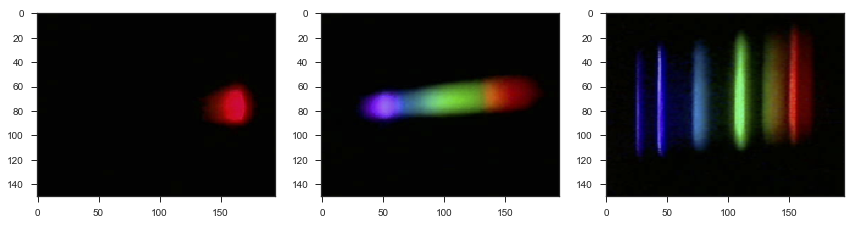

In [222]:
%matplotlib inline

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,4))

ax1.imshow(sub_img_red)
ax2.imshow(sub_img_white)
ax3.imshow(sub_img_FB)

fig.tight_layout()
fig.show()

In [212]:
sub_img_red_gray = cv2.cvtColor(sub_img_red, cv2.COLOR_BGR2GRAY)
sub_img_white_gray = cv2.cvtColor(sub_img_white, cv2.COLOR_BGR2GRAY)
sub_img_FB_gray = cv2.cvtColor(sub_img_FB, cv2.COLOR_BGR2GRAY)

In [213]:
spectrum_red = [sum(x) for x in zip(*sub_img_red_gray)]
spectrum_white = [sum(x) for x in zip(*sub_img_white_gray)]
spectrum_FB = [sum(x) for x in zip(*sub_img_FB_gray)]

In [214]:
spectrum_red = [(x-min(spectrum_red))/max(spectrum_red) for x in spectrum_red]
spectrum_white = [(x-min(spectrum_white))/max(spectrum_white) for x in spectrum_white]
spectrum_FB = [(x-min(spectrum_FB))/max(spectrum_FB) for x in spectrum_FB]

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


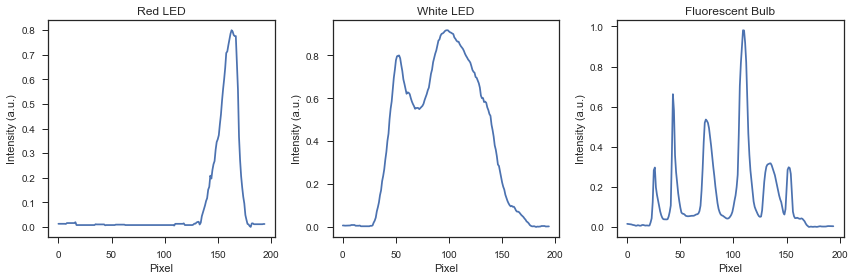

In [225]:
fig1, (ax01, ax02, ax03) = plt.subplots(1,3, figsize = (12,4))

ax01.plot(spectrum_red)
ax01.set_xlabel('Pixel')
ax01.set_ylabel('Intensity (a.u.)')
ax01.set_title('Red LED')
ax02.plot(spectrum_white)
ax02.set_xlabel('Pixel')
ax02.set_ylabel('Intensity (a.u.)')
ax02.set_title('White LED')
ax03.plot(spectrum_FB)
ax03.set_xlabel('Pixel')
ax03.set_ylabel('Intensity (a.u.)')
ax03.set_title('Fluorescent Bulb')

fig1.tight_layout()
fig1.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


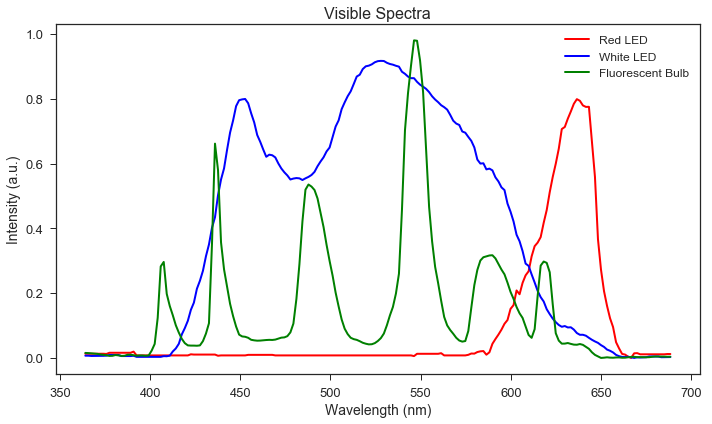

In [238]:
fig2, ax11 = plt.subplots(1,1,figsize = (10,6))

#### pixels to nm ####
#43 = 436nm
#110 = 548nm

# 548 - 436 / 110 - 43 = 1.672
# 436 = 1.672*43 + b
# nm = 0.598*pixel + 364.104
######################

nm = [1.672*x + 364.104 for x in range(len(spectrum_red))]

ax11.plot(nm, spectrum_red, '-r', lw = 2, label = 'Red LED')
ax11.plot(nm, spectrum_white, '-b', lw = 2, label = 'White LED')
ax11.plot(nm, spectrum_FB, '-g', lw = 2, label = 'Fluorescent Bulb')

ax11.set_xlabel('Wavelength (nm)', fontsize = 14)
ax11.set_ylabel('Intensity (a.u.)', fontsize = 14)
ax11.set_title('Visible Spectra', fontsize = 16)
ax11.tick_params(labelsize = 13)

ax11.legend(fontsize = 12)

fig2.tight_layout()
fig2.show()
fig2.savefig('/Users/danslaughter/Desktop/3_spectra.pdf')